In [119]:
import numpy
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [120]:
df = pd.read_csv('../detroit_needs/Improve_Detroit_Issues.csv')
df.head()
df.shape

(633347, 20)

In [99]:
df.dropna(subset=['closed_at'], inplace = True)
df.shape




(418368, 20)

In [100]:
df.dropna(subset=['created_at'], inplace = True)
df.shape

(418368, 20)

In [101]:
df.drop_duplicates(subset='id', inplace= True)
df.shape

(294688, 20)

In [103]:
df['DAYS_BEFORE_CLOSED'] = (pd.to_datetime(df["closed_at"])-pd.to_datetime(df["created_at"])).dt.days

df['DAYS_BEFORE_CLOSED'].median()


#(pd.to_datetime(df.updated_at)-pd.to_datetime(df.created_at)).dt.days



6.0

In [104]:
#temp = df.dropna(subset=['days_to_close'])
#df['days_to_close'].median()
#df['days_to_close'].mean()

dropped_council = df.dropna(subset=['council_district'])
dropped_council.shape








(155054, 21)

In [24]:
closetime_by_district = dropped_council.groupby('council_district').DAYS_BEFORE_CLOSED.mean()
closetime_by_district
print(closetime_by_district)


council_district
1.0    20.794559
2.0    27.763034
3.0    30.656177
4.0    26.249742
5.0    29.031674
6.0    26.904582
7.0    19.411192
Name: DAYS_BEFORE_CLOSED, dtype: float64


In [92]:
dropped_neigh = df.dropna(subset=['neighborhood'])
dropped_neigh.shape


(154965, 21)

In [117]:

closetime_by_neigh = dropped_neigh.groupby('neighborhood').DAYS_BEFORE_CLOSED.median()
closetime_by_neigh.nlargest(15)



neighborhood
Aviation Sub            6.0
Denby                   6.0
Detroit Golf            6.0
Evergreen Lahser 7/8    6.0
Greenwich               6.0
Indian Village          6.0
Jefferson Chalmers      6.0
Joy Community           6.0
Martin Park             6.0
Michigan-Martin         6.0
Miller Grove            6.0
Minock Park             6.0
Palmer Woods            6.0
Pembroke                6.0
Petoskey-Otsego         6.0
Name: DAYS_BEFORE_CLOSED, dtype: float64

In [87]:
dropped_req_type = df.dropna(subset=['request_type_title'])
dropped_req_type.shape
dropped_req_type['request_type_title'].value_counts()
#unique_req_types = numpy.array(dropped_req_type['request_type_title'].unique())
#issue_type_and_closing= pd.DataFrame({'unique_reqs':unique_req_types })
#issue_type_and_closing = issue_type_and_closing['unique_reqs'].sort_values()
#print(issue_type_and_closing)





DPW - Debris Removal - DPW USE ONLY                           53120
DPW - Other environmental - DPW USE ONLY                      34071
Illegal Dump Sites                                            33490
Curbside Solid Waste Issue                                    30558
Abandoned Vehicle                                             23864
Potholes                                                      16642
Tree Issue                                                    14212
Traffic Sign Issue                                             9492
Curbside - DPW ONLY                                            9131
Rodent Extermination - BSEED Only                              8395
Blocked Catch Basin                                            8322
Rodent Extermination                                           6309
Running Water in a Home or Building                            5829
Water Main Break                                               3888
Investigate Water Main Break                    

In [88]:
closetime_by_req_type = dropped_req_type.groupby('request_type_title').DAYS_BEFORE_CLOSED.median()


#issue_type_and_closing[closing_time]
closetime_by_req_type

request_type_title
Abandoned Vehicle                                               4.0
Alley Debris – GSD ONLY                                         5.0
Alley Grading - DPW Use Only                                   41.0
Blocked Catch Basin                                           143.0
Cave-In over the Sewer                                         60.0
Cemetery Issue                                                  2.0
Clogged Drain                                                 112.0
Curbside - DPW ONLY                                            21.0
Curbside Solid Waste Issue                                      8.0
DPW - Debris Removal - DPW USE ONLY                            11.0
DPW - Other environmental - DPW USE ONLY                        4.0
Dead Animal Removal                                             0.0
Fire Hydrant Issue                                              7.0
Graffiti Abatement                                              2.0
Graffiti Abatement - Major Pr

In [61]:
dropped_req_type.plot.scatter(x=['request_type_title'].value_counts(), y=dropped_req_type.groupby('request_type_title').DAYS_BEFORE_CLOSED.mean())


AttributeError: 'list' object has no attribute 'value_counts'

In [29]:
df['priority_code'].max() - df['priority_code'].min()
x = df['request_type_title'].value_counts()



<AxesSubplot:>

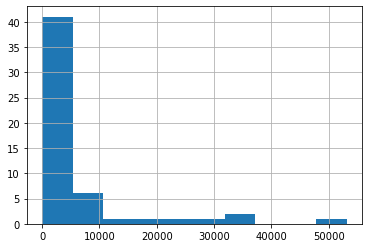

In [30]:
x.hist()